In [257]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import sys


In [258]:
os.getcwd()

'/home/ayush/Downloads/All Project/Natural Language Programming-20230826T130018Z-001-20230905T171930Z-001/Natural Language Programming-20230826T130018Z-001/MachineLearning/ML Concept/datasets'

In [259]:
os.chdir('//home/ayush//Downloads//All Project//Natural Language Programming-20230826T130018Z-001-20230905T171930Z-001//Natural Language Programming-20230826T130018Z-001//MachineLearning//ML Concept//datasets')

In [260]:
ls

company_info.csv               goalscorers.csv  shootouts.csv
company_location.csv           gpa_iq.csv       test.json
DataScientist.csv              results.csv      titanic.csv
future_release_movie_list.csv  Salary_Data.csv  train.json


In [261]:
titanic = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [262]:
titanic.sample(10)

,Survived,Age,Fare
155,0,24.0,7.5500
75,0,32.5,211.5000
222,1,22.0,10.5000
393,0,47.0,10.5000
358,0,NaN,7.7500
301,0,NaN,15.0458
121,0,NaN,7.7500
80,0,6.0,15.2458
234,0,39.0,71.2833
362,1,31.0,21.0000


In [263]:
df = titanic.dropna()  # remove all rows containing null values

In [264]:
df.shape

(331, 3)

In [265]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [266]:
!jt -t oceans16

In [267]:
print(df['Age'].mean())

30.181268882175228


In [268]:
print(df['Age'].min())

0.17


In [269]:
print(df['Age'].max())
print(df['Age'].mode())

76.0
0    21.0
1    24.0
Name: Age, dtype: float64


In [270]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [271]:
x = df.iloc[:,1:]
y = df.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42)

In [272]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_prediction = clf.predict(x_test)

In [273]:
accuracy_score(y_test,y_prediction)

0.6

In [274]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=20,scoring = 'accuracy'))

0.5529411764705883

In [275]:
kage = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kfare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [276]:
trf = ColumnTransformer(
    [('first',kage,[0]),
    ('second',kfare,[1])]
)

In [277]:
xtrain_trf = trf.fit_transform(x_train)
xtest_trf = trf.fit_transform(x_test)

In [278]:
trf.named_transformers_['first'].n_bins_

array([10])

In [279]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.17, 12.9 , 18.4 , 21.7 , 23.6 , 26.  , 28.  , 32.  , 40.  ,
              46.2 , 76.  ])                                                ],
      dtype=object)

In [280]:
output_dataframe = pd.DataFrame(
        {
            'age':x_train['Age'],
            'age_trf':xtrain_trf[:,0],
            'fare':x_train['Fare'],
            'fare_trf':xtrain_trf[:,1]
        })

In [281]:
output_dataframe.head()

,age,age_trf,fare,fare_trf
24,48.0,8.0,262.375,9.0
359,30.0,5.0,15.550,4.0
371,31.0,5.0,134.500,9.0
67,47.0,8.0,42.400,7.0
218,50.0,9.0,211.500,9.0


In [282]:
output_dataframe['age_labels'] = pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output_dataframe['fare_labels'] = pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [283]:
output_dataframe.head()

,age,age_trf,fare,fare_trf,age_labels,fare_labels
24,48.0,8.0,262.375,9.0,"(46.2, 76.0]","(78.885, 263.0]"
359,30.0,5.0,15.550,4.0,"(28.0, 32.0]","(12.01, 15.55]"
371,31.0,5.0,134.500,9.0,"(28.0, 32.0]","(78.885, 263.0]"
67,47.0,8.0,42.400,7.0,"(46.2, 76.0]","(31.421, 53.568]"
218,50.0,9.0,211.500,9.0,"(46.2, 76.0]","(78.885, 263.0]"


In [284]:
clf = DecisionTreeClassifier()


In [285]:
clf.fit(xtrain_trf,y_train)

DecisionTreeClassifier()

In [286]:
y_pred = clf.predict(xtest_trf)

In [287]:
accuracy_score(y_test,y_pred)

0.57

In [288]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=20,scoring='accuracy'))

0.5523897058823529

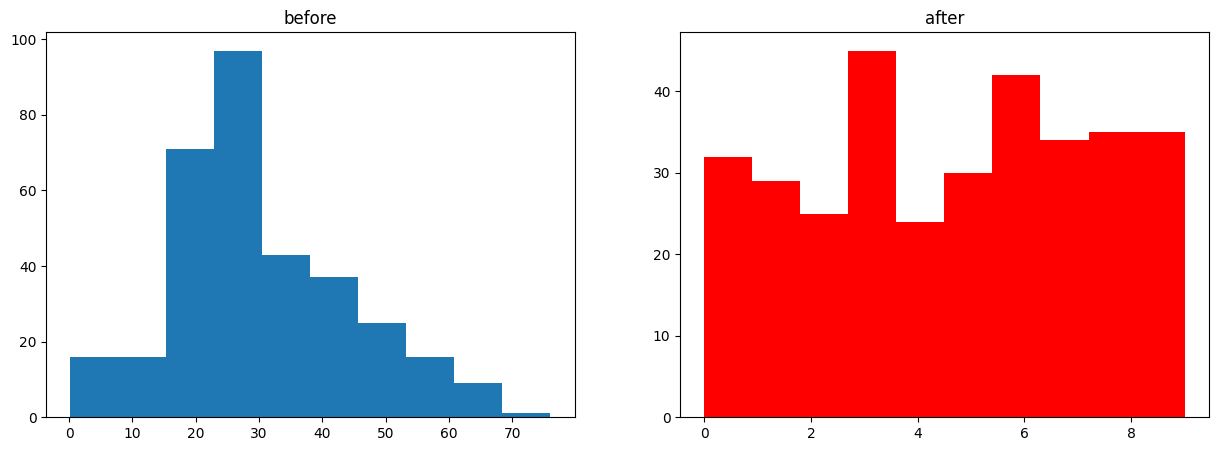

In [289]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(x['Age'])
plt.title("before")
plt.subplot(122)
plt.hist(x_trf[:,0],color='red')
plt.title("after")
plt.show()

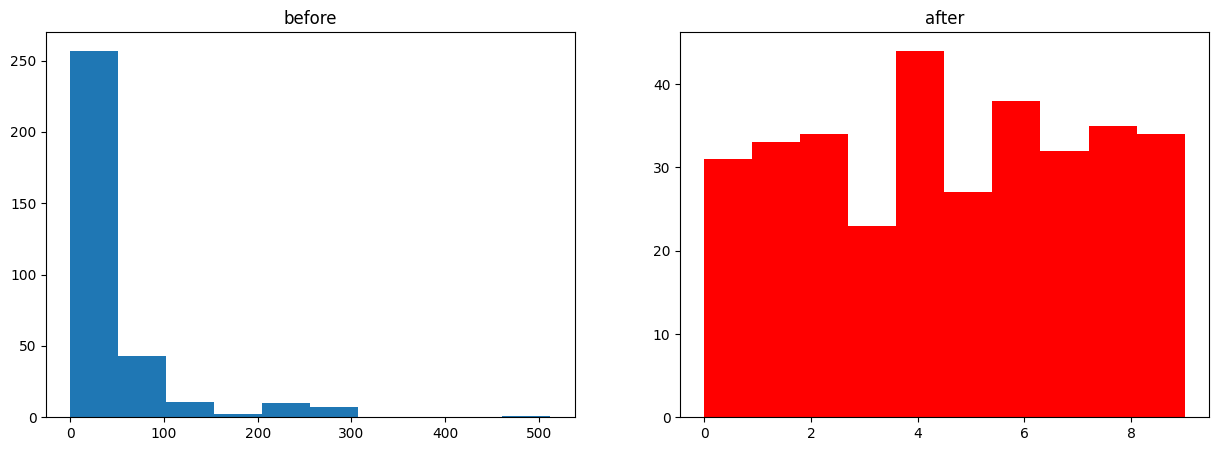

In [291]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(x['Fare'])
plt.title("before")
plt.subplot(122)
plt.hist(x_trf[:,1],color='red')
plt.title("after")
plt.show()